In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

In [4]:
np.random.seed(7)

Ucitavamo skup podataka i vrsimo pripremne korake.

In [5]:
data = datasets.load_breast_cancer()

In [6]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data.data, data.target, test_size = 0.33, random_state = 7)

In [7]:
x_train.shape

(381, 30)

In [8]:
number_of_features = x_train.shape[1]
output_size = 1

In [9]:
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Pravimo mrezu sa propagacijom unapred. 
<br>
Mreza ce imati ulazni sloj, dva skrivena sloja sa 100 i 40 neurona i izlazni sloj.
<br>
Broj neurona ulaznog sloja odgovara broju atributa skupa podataka (30). 
<br>
Broj neurona izlaznog sloja je 1. 

Keras nudi mogucnost da se pri obucavanju pozovu odredjene funkcije (eng. *callback*).
Ovo nam omogucava da cuvamo medju rezultate obucavanje (na primer tezine modela), da primenimo regularizaciju ranog zaustavljanja (eng *early stopping*) i slicno.
Vise o tome u zvanicnoj dokumentaciji [ovde](https://keras.io/callbacks/).


In [10]:
model = Sequential()
model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=output_size, activation='sigmoid'))

In [11]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3100      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 7,181
Trainable params: 7,181
Non-trainable params: 0
_________________________________________________________________


In [13]:
epochs = 30
batch_size = 16
verbose = 1
validation_split = 0.3
filepath = './checkpoints/chekpoint' + "-final-{epoch:02d}-{val_acc:.2f}.hdf5"
callbacks = [
    EarlyStopping(monitor='acc', min_delta=0, patience=3, mode='auto'),
    ModelCheckpoint(filepath=filepath, verbose=1, save_best_only=True)
]

In [14]:
history = model.fit(x_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=verbose,
                    callbacks=callbacks,
                    validation_split=validation_split)

Train on 266 samples, validate on 115 samples
Epoch 1/30
266/266 [==============================] - 0s 1ms/step - loss: 0.5564 - acc: 0.6617 - val_loss: 0.2731 - val_acc: 0.9478

Epoch 00001: val_loss improved from inf to 0.27312, saving model to ./checkpoints/chekpoint-final-01-0.95.hdf5
Epoch 2/30
266/266 [==============================] - 0s 129us/step - loss: 0.2197 - acc: 0.9361 - val_loss: 0.1507 - val_acc: 0.9652

Epoch 00002: val_loss improved from 0.27312 to 0.15071, saving model to ./checkpoints/chekpoint-final-02-0.97.hdf5
Epoch 3/30
266/266 [==============================] - 0s 119us/step - loss: 0.1433 - acc: 0.9398 - val_loss: 0.1053 - val_acc: 0.9739

Epoch 00003: val_loss improved from 0.15071 to 0.10530, saving model to ./checkpoints/chekpoint-final-03-0.97.hdf5
Epoch 4/30
266/266 [==============================] - 0s 124us/step - loss: 0.1107 - acc: 0.9511 - val_loss: 0.0812 - val_acc: 0.9826

Epoch 00004: val_loss improved from 0.10530 to 0.08119, saving model to ./c

In [15]:
epochs = history.epoch

In [16]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

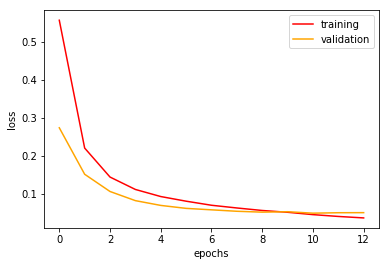

In [17]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [18]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

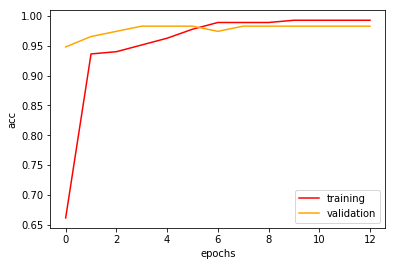

In [19]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [20]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

188/188 [==============================] - 0s 69us/step
Test loss: 0.06730485122967908, test accuracy: 0.9787234042553191


In [21]:
model.fit(x_train, y_train, epochs=8, batch_size=16)

Epoch 1/8
381/381 [==============================] - 0s 89us/step - loss: 0.0388 - acc: 0.9895
Epoch 2/8
381/381 [==============================] - 0s 89us/step - loss: 0.0339 - acc: 0.9895
Epoch 3/8
381/381 [==============================] - 0s 98us/step - loss: 0.0315 - acc: 0.9895
Epoch 4/8
381/381 [==============================] - 0s 105us/step - loss: 0.0280 - acc: 0.9921
Epoch 5/8
381/381 [==============================] - 0s 96us/step - loss: 0.0256 - acc: 0.9921
Epoch 6/8
381/381 [==============================] - 0s 94us/step - loss: 0.0225 - acc: 0.9895
Epoch 7/8
381/381 [==============================] - 0s 95us/step - loss: 0.0203 - acc: 0.9948
Epoch 8/8
381/381 [==============================] - 0s 102us/step - loss: 0.0187 - acc: 0.9948
